In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_metadata = pd.read_csv(mouse_drug_data_to_load)
trial_results = pd.read_csv(clinical_trial_data_to_load)

# Preview 
mouse_metadata.head()
trial_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
study_data_complete = pd.merge(trial_results, mouse_metadata, how="left", on="Mouse ID")

In [4]:
# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor = study_data_complete.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
mean_tumor = tumor.mean()
mean_tumor

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
                          ...    
Zoniferol  25           55.432935
           30           57.713531
           35           60.089372
           40           62.916692
           45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [6]:
# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor).reset_index()

In [7]:
# Preview DataFrame
mean_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor = study_data_complete.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
tumor.sem()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
                          ...   
Zoniferol  25           0.602513
           30           0.800043
           35           0.881426
           40           0.998515
           45           1.003576
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [9]:
# Convert to DataFrame
tumor_vol_sem_df = pd.DataFrame(tumor.sem()).reset_index()
tumor_vol_sem_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [10]:
mean_tumor_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [11]:
mean_tumor_df["Drug"].unique()

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [12]:
study_data_pivot = pd.pivot_table(mean_tumor_df, index='Timepoint', columns='Drug')["Tumor Volume (mm3)"]
study_data_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


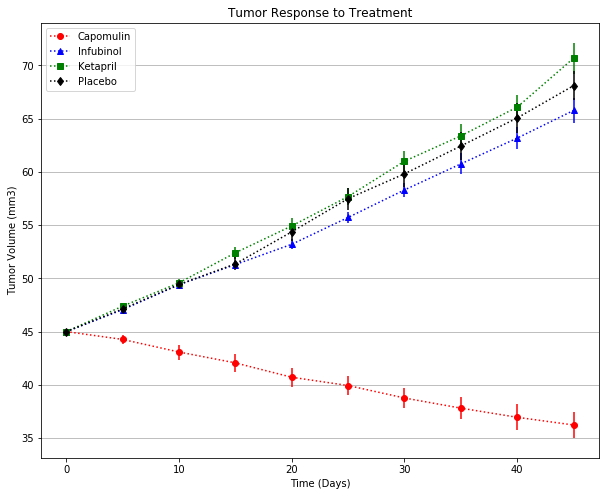

In [13]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(10,8))


ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")

ax.plot(mean_tumor["Capomulin"], color="red", marker="o", linestyle="dotted", label="Capomulin")
ax.plot(mean_tumor["Infubinol"], color="blue", marker="^", linestyle="dotted", label="Infubinol")
ax.plot(mean_tumor["Ketapril"], color="green", marker="s", linestyle="dotted", label="Ketapril")
ax.plot(mean_tumor["Placebo"], color="black", marker="d", linestyle="dotted", label="Placebo")

x_axis = np.arange(0, 50, 5)

ax.errorbar(x_axis, mean_tumor["Capomulin"], tumor.sem()["Capomulin"], color="red", linestyle="")
ax.errorbar(x_axis, mean_tumor["Infubinol"], tumor.sem()["Infubinol"], color="blue", linestyle="")
ax.errorbar(x_axis, mean_tumor["Ketapril"], tumor.sem()["Ketapril"], color="green", linestyle="")
ax.errorbar(x_axis, mean_tumor["Placebo"], tumor.sem()["Placebo"], color="black", linestyle="")

ax.yaxis.grid()

ax.legend()

# Save the Figure
plt.savefig("Tumor Response to Treatment.png")

## Metastatic Response to Treatment

In [14]:
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [15]:
# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
metastases = study_data_complete.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
mean_metastases = metastases.mean()
mean_metastases

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
                          ...   
Zoniferol  25           1.687500
           30           1.933333
           35           2.285714
           40           2.785714
           45           3.071429
Name: Metastatic Sites, Length: 100, dtype: float64

In [16]:
# Convert to DataFrame & preview dataframe
mean_metastases_df = pd.DataFrame(mean_metastases)
mean_metastases_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [17]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastases = study_data_complete.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
sem_metastases = metastases.sem()
sem_metastases

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
                          ...   
Zoniferol  25           0.236621
           30           0.248168
           35           0.285714
           40           0.299791
           45           0.286400
Name: Metastatic Sites, Length: 100, dtype: float64

In [18]:
# Convert to DataFrame
sem_metastases_df = pd.DataFrame(sem_metastases)

# Preview DataFrame
sem_metastases_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [19]:
mean_metastases_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [20]:
# Minor Data Munging to Re-Format the Data Frames and Preview that Reformatting worked
sem_metastases_pivot = sem_metastases_df.reset_index().pivot(index='Timepoint', columns='Drug')["Metastatic Sites"]
mean_metastases_pivot = mean_metastases_df.reset_index().pivot(index='Timepoint', columns='Drug')["Metastatic Sites"]
mean_metastases_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [21]:
sem_metastases_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

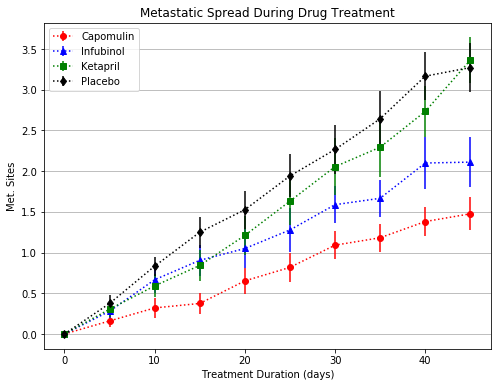

In [22]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(8,6))

plt.errorbar(mean_metastases_pivot.index, mean_metastases_pivot["Capomulin"], marker="o", linestyle="dotted",\
             color="red", label="Capomulin", yerr=sem_metastases_pivot["Capomulin"])
plt.errorbar(mean_metastases_pivot.index, mean_metastases_pivot["Infubinol"], marker="^", linestyle="dotted",\
             color="blue",label="Infubinol", yerr=sem_metastases_pivot["Infubinol"])
plt.errorbar(mean_metastases_pivot.index, mean_metastases_pivot["Ketapril"], marker="s", linestyle="dotted",\
             color="green", label="Ketapril", yerr=sem_metastases_pivot["Ketapril"])
plt.errorbar(mean_metastases_pivot.index, mean_metastases_pivot["Placebo"], marker="d", linestyle="dotted",\
             color="black", label="Placebo", yerr=sem_metastases_pivot["Placebo"])
plt.title("Metastatic Spread During Drug Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (days)")
plt.legend()
plt.grid(axis="y")

# Save the Figure
plt.savefig("Metastatic Spread.png")

# Show the Figure
plt.show()

## Survival Rates

In [23]:
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [24]:
# Store the Count of Mice Grouped by Drug and Timepoint (We can pass any metric)
mice_group = study_data_complete.drop(columns=["Tumor Volume (mm3)", "Metastatic Sites"]).groupby(["Drug", "Timepoint"]).count()\
.reset_index()

# Convert to DataFrame
mice_group = mice_group.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
mice_group.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [25]:
# Minor Data Munging to Re-Format the Data Frames
mice_group_pivot = mice_group.pivot(index='Timepoint', columns='Drug')["Mouse Count"]

# Preview the Data Frame
mice_group_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


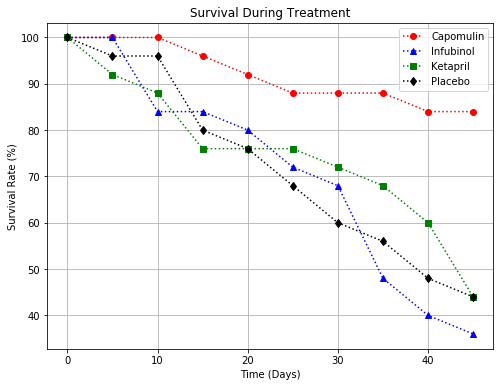

In [26]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots(figsize=(8,6))

plt.plot(mice_group_pivot["Capomulin"]/mice_group_pivot["Capomulin"].max()*100, marker="o", color="red"\
         , linestyle="dotted", label="Capomulin")
plt.plot(mice_group_pivot["Infubinol"]/mice_group_pivot["Infubinol"].max()*100, marker="^", color="blue"\
         , linestyle="dotted", label="Infubinol")
plt.plot(mice_group_pivot["Ketapril"]/mice_group_pivot["Ketapril"].max()*100, marker="s", color="green"\
         , linestyle="dotted", label="Ketapril")
plt.plot(mice_group_pivot["Placebo"]/mice_group_pivot["Placebo"].max()*100, marker="d", color="black"\
         , linestyle="dotted", label="Placebo")
plt.legend()
plt.grid(True)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("Survival During Treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [27]:
study_data_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [28]:
# Calculate the percent changes for each drug
drug_pct_change = (study_data_pivot.iloc[-1] - study_data_pivot.iloc[0])/study_data_pivot.iloc[0]*100
# Display the data to confirm
drug_pct_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

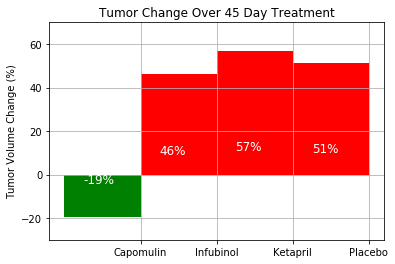

In [57]:
# Store all Relevant Percent Changes into a Tuple

drug_group_pct_change = (
    drug_pct_change["Capomulin"], 
    drug_pct_change["Infubinol"], 
    drug_pct_change["Ketapril"], 
    drug_pct_change["Placebo"]
)

# Splice the data between passing and failing drugs
ind=np.arange(len(drug_group_pct_change))
plt.bar(ind[0:], drug_group_pct_change[0:], width=1, color="green")
plt.bar(ind[1:], drug_group_pct_change[1:], width=1, color="red")

# Orient widths. Add labels, tick marks, etc. 
plt.grid(axis="both")

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("Tumor Volume Change (%)")
plt.xticks(ind+0.5, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
# plt.yticks(np.arange(-20, 70, step=20))
plt.ylim(-30, 70)

# Use functions to label the percentages of changes
def label_chart():
    x=0
    for y in drug_group_pct_change:
        x +=1
        plt.text(x-1.25, y/5, "{:.0f}%".format(y), color="white", fontsize="12")
        

# Call functions to implement the function calls
label_chart()

# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.png")    

# Show the Figure
fig.show()